In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and dir

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 

###문제1

In [4]:
from google.colab import files
file_uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
file_uploaded2=files.upload()

Saving test.csv to test.csv


##train data 살펴보기


In [21]:
train = pd.read_csv(io.BytesIO(file_uploaded['train.csv']))
train.head()

,ID_code,price,carat,cut,color,clarity,depth,table,x,y,z
0,train_1,878,0.30,Premium,G,VVS2,62.9,55.0,4.28,4.24,2.68
1,train_2,3183,0.70,Premium,D,VS1,60.9,60.0,5.75,5.71,3.49
2,train_3,624,0.30,Ideal,G,VS1,62.0,56.0,4.29,4.32,2.67
3,train_4,743,0.33,Premium,H,VS1,61.9,58.0,4.45,4.43,2.75
4,train_5,526,0.25,Very Good,F,IF,63.3,59.0,3.99,4.04,2.54


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21707 entries, 0 to 21706
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID_code  21707 non-null  object 
 1   price    21707 non-null  int64  
 2   carat    21707 non-null  float64
 3   cut      21707 non-null  object 
 4   color    21707 non-null  object 
 5   clarity  21707 non-null  object 
 6   depth    21010 non-null  float64
 7   table    21707 non-null  float64
 8   x        21707 non-null  float64
 9   y        21707 non-null  float64
 10  z        21707 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.8+ MB


In [23]:
train.describe(include='all')

,ID_code,price,carat,cut,color,clarity,depth,table,x,y,z
count,21707,21707.000000,21707.000000,21707,21707,21707,21010.000000,21707.000000,21707.000000,21707.000000,21707.000000
unique,21707,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,train_1,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,8687,4560,5277,NaN,NaN,NaN,NaN,NaN
mean,NaN,3939.077487,0.798718,NaN,NaN,NaN,61.748415,57.457350,5.732041,5.733807,3.539983
std,NaN,4009.460040,0.475534,NaN,NaN,NaN,1.410605,2.239175,1.125419,1.117037,0.722429
min,NaN,326.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000
25%,NaN,949.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,NaN,2387.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.520000
75%,NaN,5355.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000


In [24]:
test = pd.read_csv(io.BytesIO(file_uploaded2['test.csv']))
test.head()

,ID_code,carat,cut,color,clarity,depth,table,x,y,z
0,test_1,1.10,Very Good,F,SI1,60.5,60.0,6.65,6.67,4.03
1,test_2,0.41,Good,E,SI2,63.5,55.0,4.69,4.73,2.99
2,test_3,0.25,Premium,H,VVS1,59.8,59.0,4.07,4.09,2.44
3,test_4,1.52,Ideal,H,VVS2,62.8,56.0,7.32,7.30,4.59
4,test_5,0.42,Ideal,D,VVS2,62.1,55.0,4.78,4.81,2.98


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5260 entries, 0 to 5259
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID_code  5260 non-null   object 
 1   carat    5260 non-null   float64
 2   cut      5260 non-null   object 
 3   color    5260 non-null   object 
 4   clarity  5260 non-null   object 
 5   depth    5260 non-null   float64
 6   table    5260 non-null   float64
 7   x        5260 non-null   float64
 8   y        5260 non-null   float64
 9   z        5260 non-null   float64
dtypes: float64(6), object(4)
memory usage: 411.1+ KB


In [26]:
test.describe(include='all')

,ID_code,carat,cut,color,clarity,depth,table,x,y,z
count,5260,5260.00000,5260,5260,5260,5260.000000,5260.000000,5260.000000,5260.000000,5260.000000
unique,5260,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,test_1,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,2129,1101,1294,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.79696,NaN,NaN,NaN,61.732091,57.450837,5.720827,5.732586,3.530110
std,NaN,0.48681,NaN,NaN,NaN,1.421892,2.202700,1.141274,1.349770,0.713139
min,NaN,0.20000,NaN,NaN,NaN,52.200000,49.000000,3.770000,3.720000,0.000000
25%,NaN,0.39000,NaN,NaN,NaN,61.000000,56.000000,4.680000,4.690000,2.890000
50%,NaN,0.70000,NaN,NaN,NaN,61.800000,57.000000,5.675000,5.680000,3.500000
75%,NaN,1.05000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.550000,4.040000


##문제2

In [27]:
#drop을 이용해서 ID_code col 드랍하기
train.drop('ID_code',axis=1,inplace=True)
test.drop('ID_code',axis=1,inplace=True)

In [29]:
#정상적으로 제거 되었나 확인인
print(train.columns)
print(test.columns)

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


##문제3

In [56]:
import missingno as msno
from matplotlib.ticker import FuncFormatter

In [82]:
train.isna().sum()

price        0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
dtype: int64

In [49]:
test.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

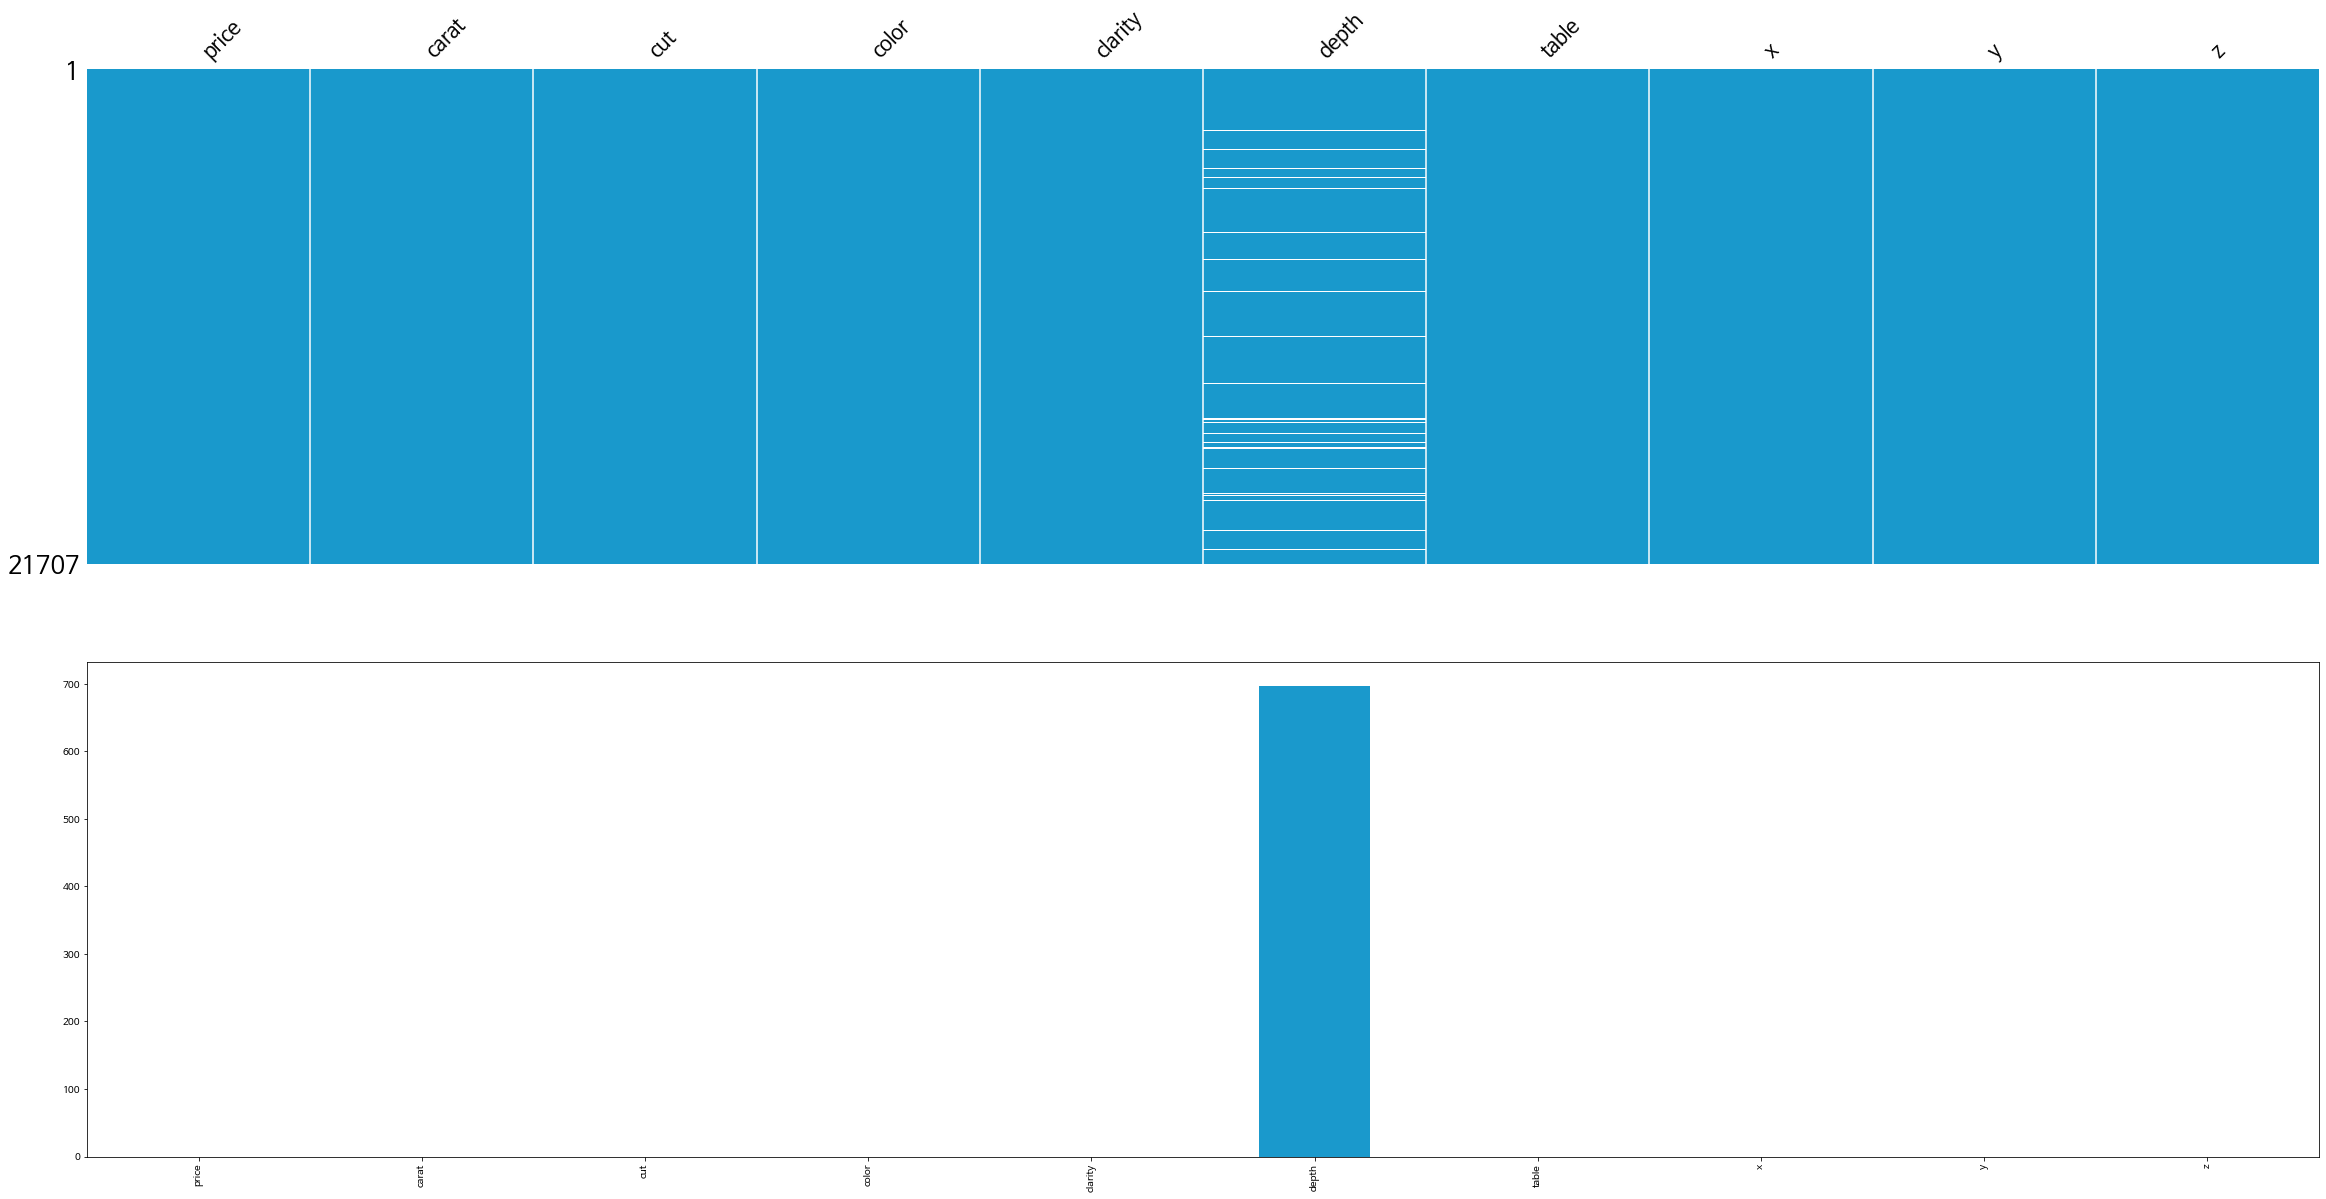

In [102]:
fig,axes = plt.subplots(2,1,figsize=(40,20))
msno.matrix(train,color=(0.1,0.6,0.8),ax=axes[0],fontsize=20)
missing = train.isnull().sum()
missing.plot.bar(color=(0.1,0.6,0.8))
plt.show()

##문제4

In [60]:
num_columns = train.select_dtypes(include=np.number).columns.tolist()
print('수치형 변수는 {}입니다.'.format(num_columns))
cat_columns = train.select_dtypes(exclude=np.number).columns.tolist()
print('범주형 변수는 {}입니다.'.format(cat_columns))

수치형 변수는 ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']입니다.
범주형 변수는 ['cut', 'color', 'clarity']입니다.




*  수치형자료 : 키, 몸무게 등 숫자형태로 측정되는 자료.
*  범주형자료 : 성별(남,여), 선호도(싫음,좋음)등,몇개의     범주를 갖는 형태로 측정되는 자료.



##문제5

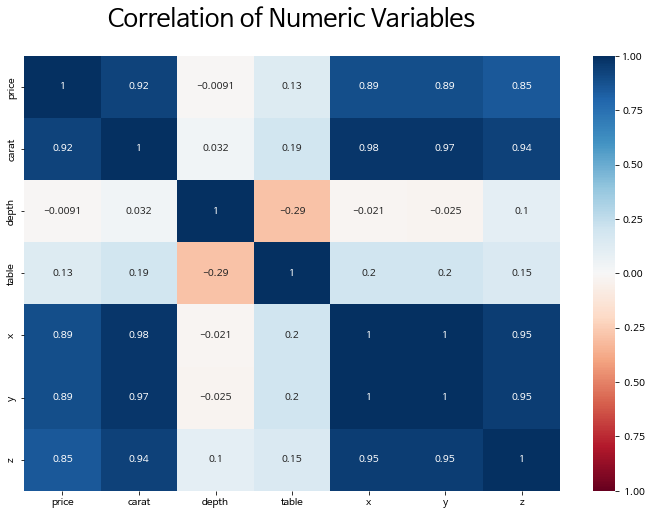

In [66]:
corr=train[num_columns].corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='RdBu',vmin=-1,vmax=1,annot=True)
plt.title('Correlation of Numeric Variables',fontsize=25,pad=30)
plt.show()



*   Price: depth와는 사실상 선형관계계가 없다, table과는 약한선형관계가 있다. 나머지 변수와는 매우 강한 선형관계에 있다.
*   Carat: Price와 마찬가지로 depth와는 사실상 없고, table과는 약한 선형관계가 있다. 나머지 변수와는 매우 강한 선형관계에 있다.
*   depth: table과 음의 선형관계가 있고, z와는 약한 선형관계에 있다. 나머지 변수와는 사실상 선형관계가 없다.
*   table: 모든 변수와 약한 선형관게에 있다. depth와는 음의 선형관계에 있다.
*   x: depth와는 관계가 없다. table과는 약한 선형관계에 있다. 나머지변수와는 매우매우 강한 선형관계에 있다.
*   y: depth와는 관계가 없다. table과는 약한 선형관계에 있다. 나머지변수와는 매우매우 강한 선형관계에 있다.
*   z: depth, table과 약한 선형관계에 있다. 나머지변수와는 매우매우 강한 선형관계에 있다.




##문제6

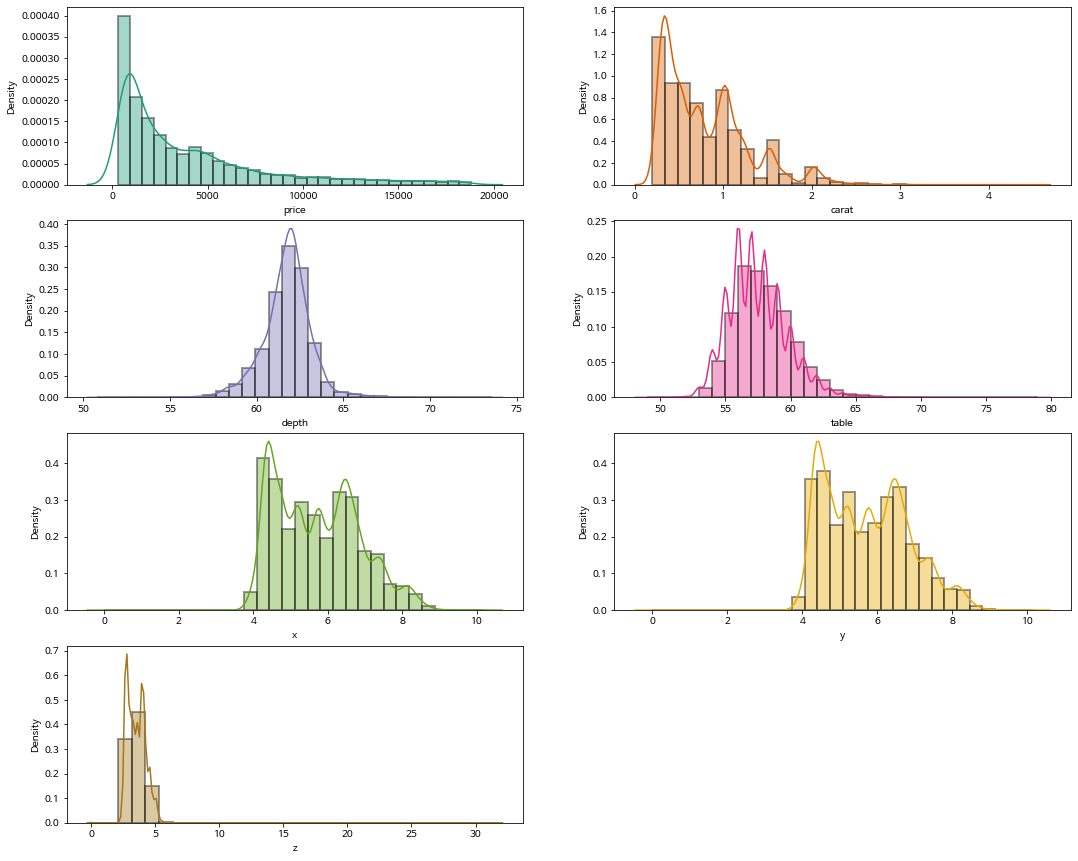

In [136]:
palette=sns.color_palette('Dark2')
plt.figure(figsize=(18,15))
plt.subplot(4,2,1)
plt.yticks(np.arange(0,0.00045,0.00005))
sns.distplot(train['price'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[0])
plt.subplot(4,2,2)
plt.yticks(np.arange(0,1.8,0.2))
sns.distplot(train['carat'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[1])
plt.subplot(4,2,3)
plt.yticks(np.arange(0,0.45,0.05))
sns.distplot(train['depth'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[2])
plt.subplot(4,2,4)
plt.yticks(np.arange(0,0.3,0.05))
sns.distplot(train['table'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[3])
plt.subplot(4,2,5)
plt.yticks(np.arange(0,0.5,0.1))
sns.distplot(train['x'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[4])
plt.subplot(4,2,6)
plt.yticks(np.arange(0,0.5,0.1))
sns.distplot(train['y'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[5])
plt.subplot(4,2,7)
plt.yticks(np.arange(0,0.8,0.1))
sns.distplot(train['z'],bins=30,hist_kws=dict(edgecolor="black", linewidth=2),color=palette[6])
plt.show()



*   Price : 오른쪽으로 꼬리가 매우 긴 형태로, 대부분의 데이터는 0과 2500사이에 분포함을 알 수 있음. 매우 적은 수의 데이터가 높은 가격대에 위치하고 있는데, 이상치가 포함되어있을 가능성이 보임. 왜도를 낮추어야한다면 로그 변환 등의 방법을 이용해야 할 수 있음.
*   Carat : 2이상인 부분이 이상치인지 아닌지 확인해봐야함.
*   Depth : 그나마 정규분포에 가까운 모양을 보임. 60언저리 즘에 평균이 있는 것을 알 수 있음.
*   Table : 이산형 분포라고 생각이 듬. 실제로 데이터를 봐보면 50에서 60언저리 쯤으로 대부분 정수임. 소수값이 거의 없음.
*    x,y : 분포가 거의 비슷한데, 예측 모델 시 둘 중 하나를 제거하는게 성능이 더 좋을 꺼 같다는 생각이 듬.
*    z : 2에서 5까지 고루 분포 하는 것으로 보임.



##문제7

In [150]:
#문제에 cut변수의 countplot하고 제가 한거랑 너무 차이가 나서 함 봤습니다. 제꺼가 이상한건가요?
train['cut'].value_counts()

Ideal        8687
Premium      5551
Very Good    4869
Good         1968
Fair          632
Name: cut, dtype: int64

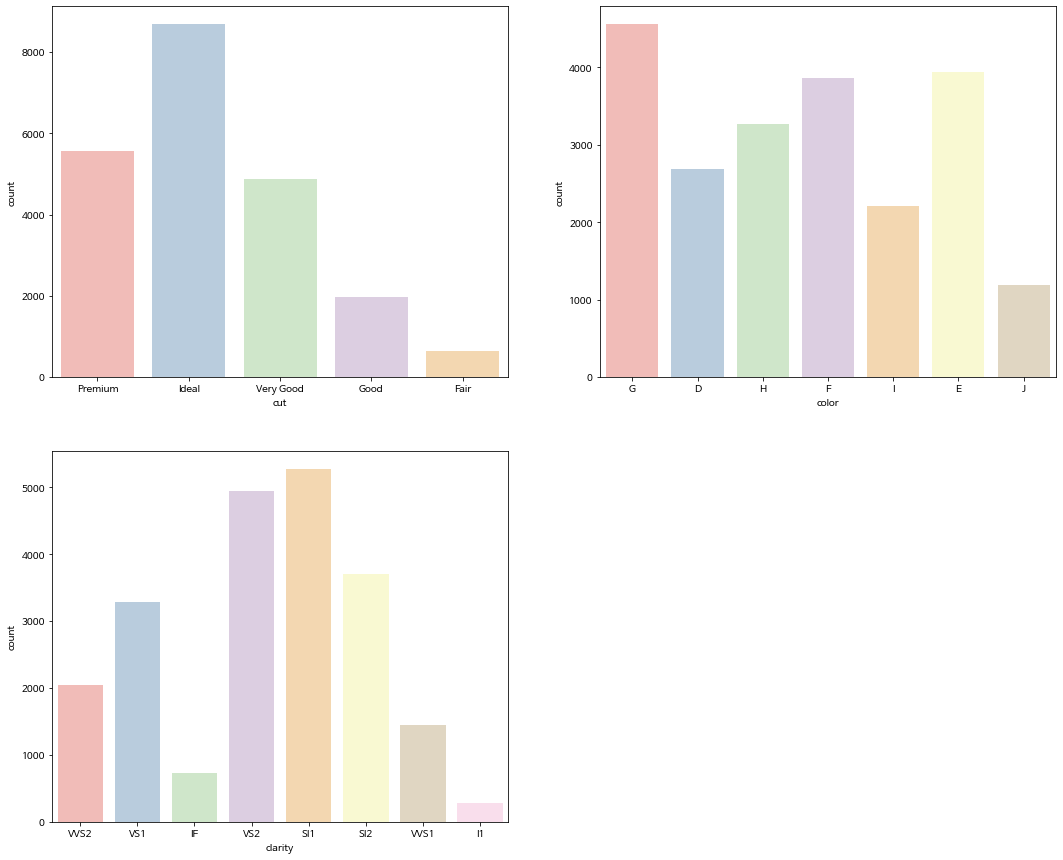

In [156]:
palette=sns.color_palette('Pastel1')
plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.countplot(x='cut',data=train,palette=palette)
plt.subplot(2,2,2)
sns.countplot(x='color',data=train,palette=palette)
plt.subplot(2,2,3)
sns.countplot(x='clarity',data=train,palette=palette)
plt.show()



*   cut : good,fair에 대해 불균형이 커서 해당 카테고리를 이용하여 예측할 때 다른 카테고리에 비해 어려움이 있을 수 있음
*   color : J가 살짝 적지만 그래도 골고루 분포하고 있음
*   clarity : H와 F에 불균형이 커서 해당 카테고리를 이용하여 예측할 때 다른 카테고리에 비해 어려움이 있을 수 있음




##문제8



*   Test Data와 Train Data에 동일한 전처리를 진행해야 하는 이유:
 모델 학습 시 사용하는 Train Set과 모델 성능을 평가하는 Test Set간의 일관성을 유지하기 위함임. 두 세트의 전처리를 다르게 진행하면 모델은 Train set에서는 동작하지만 Test set에서는 동작하지 않을 수 있음. 예를 들어, Train set에서는 결측치를 평균값으로 대체했다면, Test set에서도 결측치를 평균값으로 대체해야 함함. 만약 Test set에서는 결측치를 0으로 대체한다면, 모델은 Train set에서 학습한 방식과 달라져서 예측 성능이 떨어질 수 있음.
*   Data Leakage : 모델이 값을 예측 할 때 사용되지 않았어야 할 정보가 모델링에 사용되는 경우 발생함. 이 경우 모델이 현재 가지고 있지 않는 미래의 데이터를 예측 할 때, 모델의 성능을 과대평가하게 되는 문제가 발생할 수 있음. Data Leakage는 모델링의 결과를 왜곡시켜 결과적으로 제대로 작동하지 않을 가능성이 높아짐. 



##문제9

In [167]:
cat_columns

['cut', 'color', 'clarity']

In [161]:
#평균값으로 결측치 대체
#test데이터는 결측치 없음
mean_depth=train['depth'].mean()
train['depth']=train['depth'].fillna(mean_depth)
train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [166]:
from sklearn.preprocessing import LabelEncoder

In [177]:
le=LabelEncoder()
for col in cat_columns:
  train[col+'_encoded']=le.fit_transform(train[col])
  test[col+'_encoded']=le.fit_transform(test[col])

###Chapter 2 : XGBoost & LightGBM

##문제1

In [181]:
def seed_everything(seed: int = 3031):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

##문제2

In [182]:
from sklearn.model_selection import KFold

In [183]:
kf = KFold(n_splits=5,shuffle=True)



*   XGBoost(Extreme Gradient Boosting)와 LightGBM(Light Gradient Boosting Machine)은 모두 Gradient Boosting 알고리즘을 기반으로 한 머신러닝 모델임임. Gradient Boosting은 이전 트리의 예측 오차를 현재 트리의 입력값으로 사용하여, 새로운 트리를 만들어 예측 오차를 줄여나가는 알고리즘으로 두 모델 모두 이 알고리즘을 기반으로 함.
*   두 모델은 트리를 분기에 차이점이 있음. XGBoost는 



<generator object _BaseKFold.split at 0x7fbf604f6c80>


##문제3

In [188]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor